# CASE STUDY
# MARKETING ANALYTICS FOR E-COMMERCE MARKET PLACE COMPANY

### Business Context:
#### The client is one of the leading online market place in India and would like partner with Analytixlabs.Client wants help in measuring, managing and analysing performance of business. Analytixlabs has hired you as an analyst for this project where client asked you to provide data driven insights about business and understand customer, seller behaviors, product behavior and channel behavior etc...

In [112]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [113]:
# Import Data File

cust = pd.read_csv("D:\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\CUSTOMERS.csv")
location = pd.read_csv("D:\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\GEO_LOCATION.csv")
items = pd.read_csv("D:\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_ITEMS.csv")
payments = pd.read_csv("D:\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_PAYMENTS.csv")
review_ratings = pd.read_csv("D:\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")
orders = pd.read_csv("D:\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDERS.csv")
prod = pd.read_csv("D:\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\PRODUCTS.csv")
Sellers = pd.read_csv("D:\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\SELLERS.csv")

In [114]:
cust.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh


In [115]:
location.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh


In [116]:
items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93


In [117]:
payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [118]:
review_ratings.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05


In [119]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [120]:
prod.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [121]:
Sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh


In [122]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)

### 1. Perform Detailed exploratory analysis
#### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…).

In [123]:
se_it=pd.merge(left=pd.merge(left=items,right=prod,on="product_id",how="left"),
               right=Sellers,on="seller_id",how='left')

In [124]:
se_it

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,Serilingampalle,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,Akkarampalle,Andhra Pradesh
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,Goredi Chancha,Rajasthan
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,Adilabad,Andhra Pradesh
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,Kumhari,Chhattisgarh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41,Housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,Sadasivpet,Andhra Pradesh
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53,Computers_Accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,1206,Akkarampalle,Andhra Pradesh
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95,Sports_Leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0,80610,Anakapalle,Andhra Pradesh
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72,Computers_Accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,4733,Akkarampalle,Andhra Pradesh


In [125]:
cust_info=pd.merge(left=cust,right=pd.merge(left=orders,right=payments,on="order_id",how="inner"),on="customer_id",how="inner")
tran=pd.merge(left=cust_info,right=se_it,on="order_id",how="inner")
tran

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,Vijayawada,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,Sadasivpet,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577,Vijayawada,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577,Vijayawada,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940,Tarsali,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,51.0,489.0,2.0,611.0,22.0,22.0,23.0,17400,Kansepur,Haryana
117597,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,14802,Singapur,Andhra Pradesh
117598,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,60.0,575.0,1.0,870.0,25.0,20.0,18.0,3304,Akkarampalle,Andhra Pradesh
117599,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,59.0,452.0,1.0,710.0,19.0,13.0,14.0,14840,Freelandgunj,Gujarat


In [126]:
trans=pd.merge(left=tran,right=review_ratings,on="order_id",how="inner")
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118315 non-null  object        
 1   customer_unique_id             118315 non-null  object        
 2   customer_zip_code_prefix       118315 non-null  int64         
 3   customer_city                  118315 non-null  object        
 4   customer_state                 118315 non-null  object        
 5   order_id                       118315 non-null  object        
 6   order_status                   118315 non-null  object        
 7   order_purchase_timestamp       118315 non-null  datetime64[ns]
 8   order_approved_at              118300 non-null  object        
 9   order_delivered_carrier_date   117061 non-null  object        
 10  order_delivered_customer_date  115727 non-null  object        
 11  

In [127]:
trans.isnull()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
118311,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
118312,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
118313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [128]:
trans["order_delivered_carrier_date"] = pd.to_datetime(trans.order_delivered_carrier_date)
trans["order_delivered_customer_date"] = pd.to_datetime(trans.order_delivered_customer_date)

trans["order_estimated_delivery_date"] = pd.to_datetime(trans.order_estimated_delivery_date)
trans["order_purchase_timestamp"] = pd.to_datetime(trans.order_purchase_timestamp)


trans["order_approved_at"] = pd.to_datetime(trans. order_approved_at)
trans["review_creation_date"] = pd.to_datetime(trans.review_creation_date)

trans["review_answer_timestamp"] = pd.to_datetime(trans. review_answer_timestamp)
trans["shipping_limit_date"] = pd.to_datetime(trans. shipping_limit_date)

trans['seller_zip_code_prefix'] = trans['seller_zip_code_prefix'].apply(lambda x: str(x))
trans['customer_zip_code_prefix'] = trans['customer_zip_code_prefix'].apply(lambda x: str(x))

In [129]:
# Summary for the Data.

def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [130]:
def categorical_var_summary( x ):
    
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['n', 'nmiss', 'MODE', 'FREQ', 'PERCENT'])

In [131]:
numeric_columns = trans.select_dtypes(include = ['float64','float32', 'int64'])
object_columns = trans.select_dtypes(include = ['object'])

In [132]:
numeric_audit=numeric_columns.apply( lambda x: continuous_var_summary(x))
numeric_audit

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
dtype,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
cardinality,29,24,28938,21,5968,6999,66,2960,19,2204,99,102,95,5
n_tot,118315,118315,118315,118315,118315,118315,118315,118315,118315,118315,118315,118315,118315,118315
n,118315,118315,118315,118315,118315,118315,116606,116606,116606,118295,118295,118295,118295,118315
nmiss,0,0,0,0,0,0,1709,1709,1709,20,20,20,20,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,1.444449,1.444449,1.444449,0.016904,0.016904,0.016904,0.016904,0.0
sum,129444,348260,20418288.15,141565,14274826.26,2370207.19,5686616.0,91645787.0,257133.0,249878197.0,3580225.0,1966064.0,2729666.0,474982
mean,1.094062,2.943498,172.575651,1.196509,120.651027,20.033024,48.767782,785.944008,2.205144,2112.331011,30.265227,16.620009,23.075075,4.014554
std,0.728555,2.778022,267.104661,0.699452,184.109626,15.836523,10.033375,652.578636,1.717429,3786.717861,16.189038,13.453941,11.749311,1.400186
var,0.530792,7.717407,71344.899899,0.489233,33896.354488,250.795451,100.668616,425858.876235,2.949563,14339232.159567,262.084954,181.008521,138.046311,1.96052


In [133]:
categorical_audit= object_columns.apply( lambda x: categorical_var_summary(x))
categorical_audit

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,payment_type,product_id,seller_id,product_category_name,seller_zip_code_prefix,seller_city,seller_state,review_id
n,118315,118315,118315,118315,118315,118315,118315,118315,118315,118315,116581,118315,116664,116664,118315
nmiss,0,0,0,0,0,0,0,0,0,0,1734,0,1651,1651,0
MODE,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,24220,Akkarampalle,Andhra Pradesh,895ab968e7bb0d5659d16cd74cd1650c,delivered,credit_card,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,Bed_Bath_Table,14940,Akkarampalle,Andhra Pradesh,eef5dbca8d37dfce6db7d7b16dd0525e
FREQ,63,75,161,18728,72803,63,115728,87266,536,2155,11990,8375,29367,79947,63
PERCENT,0.05,0.06,0.14,15.83,61.53,0.05,97.81,73.76,0.45,1.82,10.28,7.08,25.17,68.53,0.05


In [134]:
total=round(trans["payment_value"].sum(),2)
print("Total Revenue:",total)

Total Revenue: 20418288.15


In [135]:
trans["Quantity"]=trans["payment_value"]/(trans["price"]+trans["freight_value"])
trans.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp,Quantity
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,...,64.0,31.0,8577,Vijayawada,Andhra Pradesh,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:00,1.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,...,15.0,40.0,88303,Sadasivpet,Andhra Pradesh,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30,2018-02-10 22:43:00,1.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,...,52.0,17.0,8577,Vijayawada,Andhra Pradesh,5ad6695d76ee186dc473c42706984d87,5,2018-06-15,2018-06-15 12:10:00,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,...,51.0,28.0,8577,Vijayawada,Andhra Pradesh,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29,2018-04-02 18:36:00,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,...,15.0,35.0,14940,Tarsali,Gujarat,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10,2018-08-17 01:59:00,1.0


In [136]:
TQ=round(trans['Quantity'].sum(),2)
print('Total Quantity:',TQ)

TP=prod['product_id'].count()
print ('Total Product:',TP)

Tpc=prod['product_category_name'].nunique()
print('Total Product Category:',Tpc)

TS=Sellers['seller_id'].count()
print('Total Sellers:',TS)

TL=location['geolocation_zip_code_prefix'].count()
print ('Total Location:',TL)

TC=trans['payment_type'].nunique()
print ('Total Payment Mathods:',TC)

Total Quantity: 161164.32
Total Product: 32951
Total Product Category: 71
Total Sellers: 3095
Total Location: 19015
Total Payment Mathods: 4


### b. Understanding how many new customers acquired every month.

In [137]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')

In [138]:
orders['Year_month'] = orders.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))

In [139]:
cust_orders = pd.merge(cust , orders , how = 'left' , on= 'customer_id')

In [140]:
cust_month = cust_orders.loc[:, ['customer_unique_id', 'Year_month']] 

In [141]:
cust_month.drop_duplicates(subset='customer_unique_id' , inplace= True)

In [142]:
new_cust_monthly = cust_month.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly

,customer_unique_id
Year_month,
2016-09,4
2016-10,315
2017-01,749
2017-02,1727
2017-03,2595
2017-04,2318
2017-05,3533
2017-06,3103
2017-07,3864


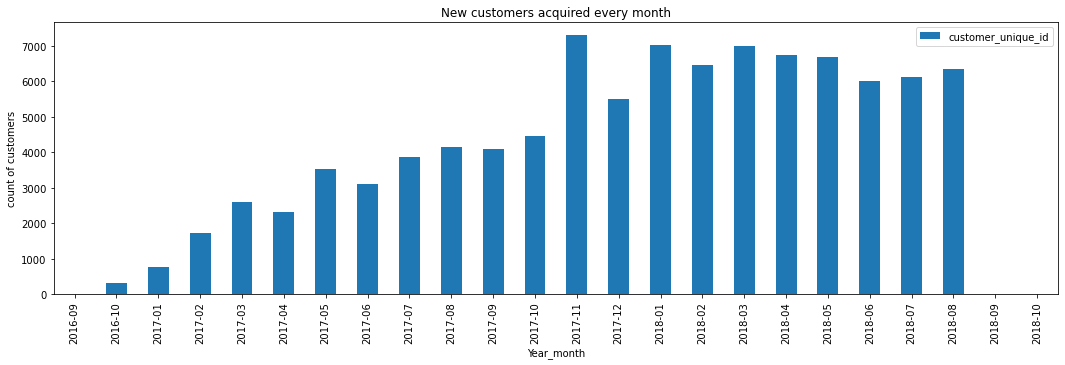

In [187]:
new_cust_monthly.plot( kind = 'bar', figsize = (18,5))
plt.ylabel('count of customers')
plt.title('New customers acquired every month')
plt.show()

### c. Understand the retention of customers on month on month basis

In [144]:
cust_monthly_cnt = cust_orders.groupby('Year_month')[['customer_unique_id']].count().reset_index()
cust_monthly_cnt

,Year_month,customer_unique_id
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [145]:
cust_monthly_cnt.customer_unique_id.sum()

99441

In [146]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")
retented_cust_monthly

,Year_month,customer_unique_id_x,customer_unique_id_y
0,2016-09,4,4
1,2016-10,315,324
2,2017-01,749,800
3,2017-02,1727,1780
4,2017-03,2595,2682
5,2017-04,2318,2404
6,2017-05,3533,3700
7,2017-06,3103,3245
8,2017-07,3864,4026
9,2017-08,4144,4331


In [147]:
retented_cust_monthly['retented_cust'] = retented_cust_monthly.customer_unique_id_y - retented_cust_monthly.customer_unique_id_x
retented_cust_monthly

,Year_month,customer_unique_id_x,customer_unique_id_y,retented_cust
0,2016-09,4,4,0
1,2016-10,315,324,9
2,2017-01,749,800,51
3,2017-02,1727,1780,53
4,2017-03,2595,2682,87
5,2017-04,2318,2404,86
6,2017-05,3533,3700,167
7,2017-06,3103,3245,142
8,2017-07,3864,4026,162
9,2017-08,4144,4331,187


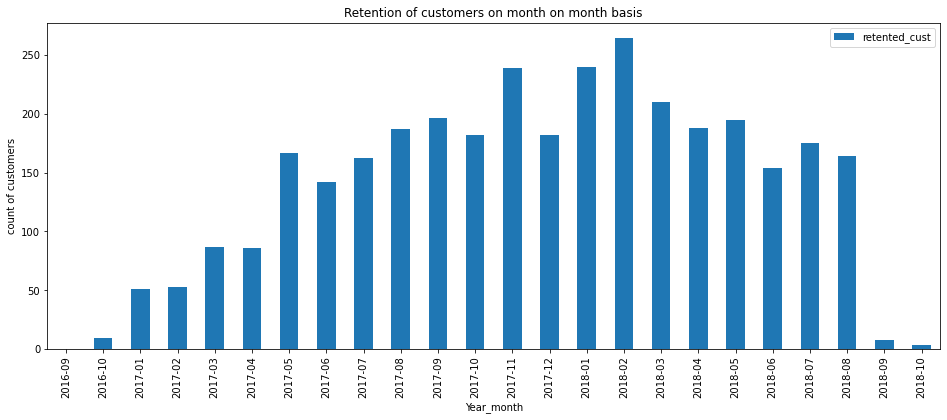

In [148]:
retented_cust_monthly.plot(kind= 'bar', x= 'Year_month' , y = 'retented_cust' , figsize = (16,6))
plt.ylabel('count of customers')
plt.title('Retention of customers on month on month basis')
plt.show()

### d. How the revenues from existing/new customers on month on month basis

In [149]:
order_item_month = pd.merge(items , orders , how= 'left' , on= 'order_id')
order_item_month['net_price'] = order_item_month.price + order_item_month.freight_value
rev_mouth = order_item_month.groupby('Year_month')[['net_price']].sum()
rev_mouth.head()

,net_price
Year_month,
2016-09,354.75
2016-10,56808.84
2016-12,19.62
2017-01,137188.49
2017-02,286280.62


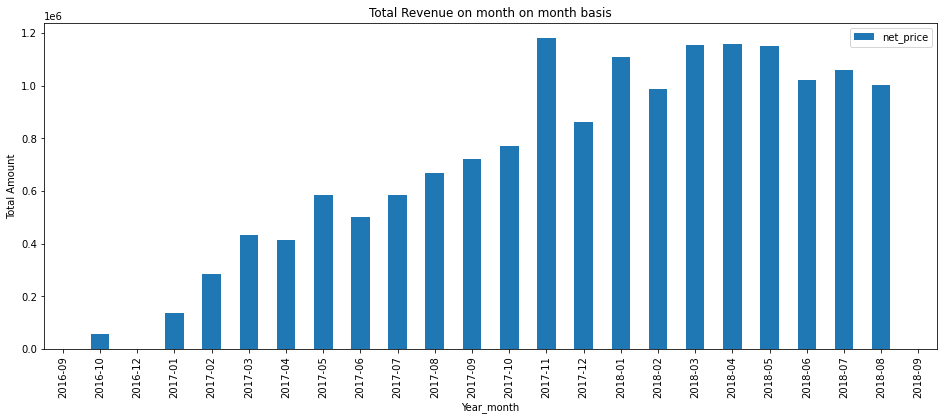

In [150]:
rev_mouth.plot( kind = 'bar', figsize =(16,6))
plt.ylabel('Total Amount')
plt.title('Total Revenue on month on month basis')
plt.show()

In [151]:
rev=pd.merge(left=orders,right=payments,on="order_id",how="inner")
rev['order_purchase_timestamp'] = pd.to_datetime(rev.order_purchase_timestamp)

In [152]:
rev['Month'] = rev['order_purchase_timestamp'].apply(lambda x: x.strftime('%B'))
rev['Year'] = rev['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y'))
rev

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,payment_sequential,payment_type,payment_installments,payment_value,Month,Year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,1,credit_card,1,18.12,October,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,3,voucher,1,2.00,October,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,2,voucher,1,18.59,October,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07,1,UPI,1,141.46,July,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018-08,1,credit_card,3,179.12,August,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,2017-03,1,credit_card,3,85.08,March,2017
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,2018-02,1,credit_card,3,195.00,February,2018
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,2017-08,1,credit_card,5,271.01,August,2017
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,2018-01,1,credit_card,4,441.16,January,2018


In [153]:
revn=rev.groupby(['Year','Month'])['payment_value'].sum()
revn.to_frame() 

payment_value
Year Month                   
2016 December           19.62
     October         59090.48
     September         252.24
2017 April          417788.03
     August         674396.32
     December       878401.48
     February       291908.01
     January        138488.04
     July           592382.92
     June           511276.38
     March          449863.60
     May            592918.82
     November      1194882.80
     October        779677.88
     September      727762.45
2018 April         1160785.48
     August        1022425.32
     February       992463.34
     January       1115004.18
     July          1066540.75
     June          1023880.50
     March         1159652.12
     May           1153982.15
     October           589.67
     September        4439.54

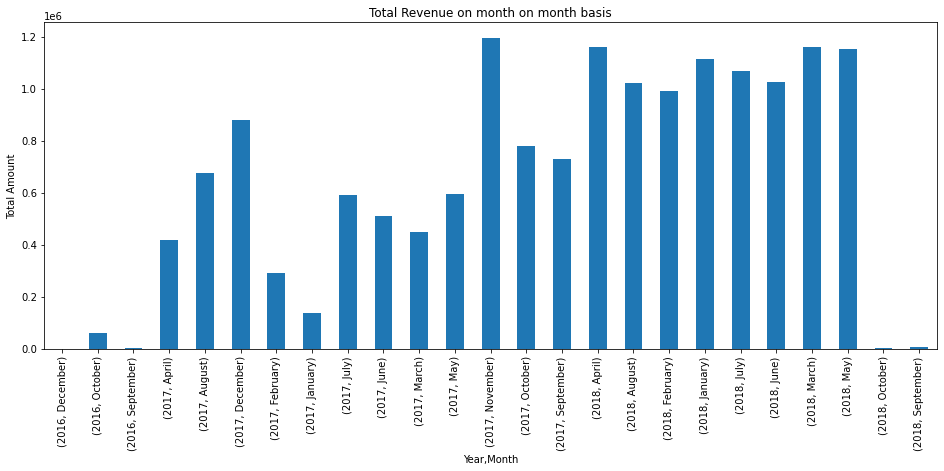

In [154]:
revn.plot( kind = 'bar', figsize =(16,6))
plt.ylabel('Total Amount')
plt.title('Total Revenue on month on month basis')
plt.show()

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…


In [155]:
order_items_prod = pd.merge( order_item_month , prod , how ='left' , on = 'product_id')


In [156]:
order_items_prod['month'] = order_items_prod.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%b"))
order_items_prod.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,net_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,...,72.19,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,Sep
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,...,259.83,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,Apr
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,...,216.87,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,Jan
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,...,25.78,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,Aug
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,...,218.04,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,Feb


In [157]:
cat_qty_sales = order_items_prod.groupby('product_category_name').agg({'product_id':'count',
                                                       'price': 'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                      'price':'sales'})
cat_qty_sales

,product_category_name,quantity,sales
0,Agro_Industry_And_Commerce,212,72530.47
1,Air_Conditioning,297,55024.96
2,Art,209,24202.64
3,Arts_And_Craftmanship,24,1814.01
4,Audio,364,50688.50
...,...,...,...
66,Stationery,2517,230943.23
67,Tablets_Printing_Image,83,7528.41
68,Telephony,4545,323667.53
69,Toys,4117,483946.60


In [158]:
month_qty_sales = order_items_prod.groupby('month').agg({'product_id':'count',
                                                       'price': 'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                      'price':'sales'})
month_qty_sales

,month,quantity,sales
0,Apr,10659,1356574.98
1,Aug,12158,1428658.01
2,Dec,6309,743925.07
3,Feb,9623,1091481.73
4,Jan,9163,1070343.23
5,Jul,11611,1393538.70
6,Jun,10661,1298162.91
7,Mar,11217,1357557.74
8,May,12061,1502588.82
9,Nov,8665,1010271.37


### f. Popular Products by seller, state, category.

In [159]:
prod_seller = order_items_prod.groupby(['seller_id','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_seller= prod_seller.sort_values(by=['seller_id','count']).drop_duplicates(subset='seller_id' ,keep='last')
prod_seller

,seller_id,product_id,count
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
12,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
14,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
37,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
34388,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
34397,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
34402,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
34430,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


In [160]:
prod_cat = order_items_prod.groupby(['product_category_name','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_cat= prod_cat.sort_values(by=['product_category_name','count']).drop_duplicates(subset='product_category_name' ,keep='last')
prod_cat

,product_category_name,product_id,count
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,22
144,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
218,Art,4fe644d766c7566dbc46fb851363cb3b,107
267,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
316,Audio,db5efde3ad0cc579b130d71c4b2db522,48
...,...,...,...
28426,Stationery,fb55982be901439613a95940feefd9ee,84
28449,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,33
29470,Telephony,e7cc48a9daff5436f63d3aad9426f28b,93
30360,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,99


### g. Popular categories by state, month

In [161]:
print(' Popular categories by state')
(trans.groupby(['customer_state','product_category_name'])['product_category_name'].agg(['count']).sort_values(by='count',ascending=False).reset_index().drop_duplicates('customer_state', keep='first'))

 Popular categories by state


,customer_state,product_category_name,count
0,Andhra Pradesh,Bed_Bath_Table,7736
19,Gujarat,Bed_Bath_Table,808
20,Chhattisgarh,Bed_Bath_Table,733
37,Karnataka,Bed_Bath_Table,412
47,Madhya Pradesh,Bed_Bath_Table,339
50,Delhi,Health_Beauty,334
59,Haryana,Bed_Bath_Table,296
81,Tamil Nadu,Bed_Bath_Table,222
83,Maharashtra,Bed_Bath_Table,220
100,Jammu & Kashmir,Bed_Bath_Table,185


In [162]:
 print('Popular categories by month')
(order_items_prod.groupby(['month','product_category_name'])['product_category_name'].agg(['count']).sort_values(by=['count'],ascending=False).reset_index().drop_duplicates('month', keep='first'))

Popular categories by month


,month,product_category_name,count
0,Aug,Health_Beauty,1209
1,Jul,Bed_Bath_Table,1203
3,Jun,Bed_Bath_Table,1155
5,May,Bed_Bath_Table,1116
7,Mar,Bed_Bath_Table,1087
8,Feb,Computers_Accessories,1087
10,Apr,Bed_Bath_Table,1020
11,Nov,Bed_Bath_Table,975
19,Jan,Bed_Bath_Table,896
55,Oct,Bed_Bath_Table,553


### h. List top 10 most expensive products sorted by price

In [163]:
print('10 most expensive products sorted by price')
result1=items.sort_values( by='price',ascending=False).reset_index()
top10=result1.loc[:,['product_id','price']].head(10)
top10

10 most expensive products sorted by price


,product_id,price
0,489ae2aa008f021502940f251d4cce7f,6735.00
1,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
2,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
3,a6492cc69376c469ab6f61d8f44de961,4799.00
4,c3ed642d592594bb648ff4a04cee2747,4690.00
5,259037a6a41845e455183f89c5035f18,4590.00
6,a1beef8f3992dbd4cd8726796aa69c53,4399.87
7,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
8,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
9,6902c1962dd19d540807d0ab8fade5c6,3999.90


## 2. Performing Customers/sellers Segmentation
### a. Divide the customers into groups based on the revenue generated 

In [164]:
cust_order_item = pd.merge(cust_orders , items , how ='inner', on= 'order_id' )
cust_order_item.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-05,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-03,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-07,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25


In [165]:
cust_order_item['net_price'] = cust_order_item.price + cust_order_item.freight_value

In [166]:
cust_rev = cust_order_item.groupby('customer_unique_id')['net_price'].sum().reset_index()
cust_rev.rename(columns ={'net_price':'total_spend_amt'} , inplace = True)
cust_rev.head()

,customer_unique_id,total_spend_amt
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [167]:
cust_rev['cust_rev_group'] = pd.cut(cust_rev.total_spend_amt,
                               bins= np.arange(0 , 15000, 1000),
                               labels=['0-1000','1000-2000','2000-3000','3000-4000',
                                       '4000-5000','5000-6000','6000-7000','7000-8000','8000-9000',
                                      '9000-10000','10000-11000','11000-12000','12000-13000','13000-14000'])

In [168]:
cust_rev.head()

,customer_unique_id,total_spend_amt,cust_rev_group
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,0-1000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0-1000
2,0000f46a3911fa3c0805444483337064,86.22,0-1000
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,0-1000
4,0004aac84e0df4da2b147fca70cf8255,196.89,0-1000


### b. Divide the sellers into groups based on the revenue generated.

In [169]:
sellers_rev = items.groupby('seller_id')['price'].sum().reset_index()
sellers_rev.rename( columns = {'price':'total_sold_amt'}, inplace= True)
sellers_rev.total_sold_amt.max()

229472.63

In [170]:
sellers_rev['sellers_rev_group'] = pd.cut(sellers_rev.total_sold_amt,
                               bins= np.arange(0 , 300000, 50000),
                               labels=['0-50000','50000-100000','100000-150000','150000-200000',
                                       '200000-250000'])
sellers_rev.head()

,seller_id,total_sold_amt,sellers_rev_group
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,0-50000
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,0-50000
2,001e6ad469a905060d959994f1b41e4f,250.00,0-50000
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,0-50000
4,003554e2dce176b5555353e4f3555ac8,120.00,0-50000


### 3. Cross-Selling (Which products are selling together)

In [171]:
orders_order_items = pd.merge(orders , items , how='left' , on='order_id' )
orders_order_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018-08,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018 8:55,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,2017-11,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,11/23/2017 19:45,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,2018-02,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2/19/2018 20:31,19.90,8.72


In [172]:
cross_selling = orders_order_items[orders_order_items.duplicated(['order_purchase_timestamp','customer_id'],
                                                                 keep=False)].sort_values(by='order_purchase_timestamp')
cross_selling = cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id' ]]

cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],
                                                       keep=False)].sort_values(by='order_purchase_timestamp').reset_index()
cross_selling.drop(columns = 'index',axis=1, inplace=True)

print('Products with same customer id and order purchase timestamp are cross selling')
cross_selling

Products with same customer id and order purchase timestamp are cross selling


,customer_id,order_purchase_timestamp,product_id
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,f293394c72c9b5fafd7023301fc21fc2
1,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,c1488892604e4ba5cff5b4eb4d595400
2,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,79938780eb7ffb7289f59a9a283bc06b
3,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,8f1e43e0e3374ed8c84df748034d6179
4,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,35bd74b6319ba18ae4f30d8b54144fd2
...,...,...,...
3566,72a366446dd3abfc90c598896714d85c,2018-08-26 11:02:00,7052c556fc966a2321d570f3c5a8790f
3567,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,df4bcf4a328103951507064660c445e9
3568,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,3af5874bd2429ed183a5445d1432fcde
3569,c24bbeb8111fea27eab791a37e665210,2018-08-27 12:39:00,b6b220a6c539cb65be34eed6fea8fe63


## 4. Payment Behaviour
### a. How customers are paying?

In [188]:
cust_pay = payments.payment_type.drop_duplicates().reset_index().drop(columns = 'index')

print('Customers are paying by Credit cards, UPIs, Vouchers and Debit cards.')
cust_pay

Customers are paying by Credit cards, UPIs, Vouchers and Debit cards.


,payment_type
0,credit_card
1,UPI
2,voucher
3,debit_card
4,not_defined


#### **Customers are paying by Credit cards, UPIs, Vouchers and Debit cards.

### b. Which payment channels are used by most customers?

In [195]:
pay_chnnl = payments.groupby('payment_type')[['payment_type']].count()
pay_chnnl = pay_chnnl.rename( columns={'payment_type':'No_of_transaction'}).sort_values(by='No_of_transaction',
                                                                                                              ascending = False).reset_index()
print('For the payments, Credit card and UPI are used by most of the customers')
pay_chnnl

For the payments, Credit card and UPI are used by most of the customers


,payment_type,No_of_transaction
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


#### **For the payments, Credit card and UPI are used by most of the customers

## 5. Customer satisfaction towards category & product
### a. Which categories (top 10) are maximum rated & minimum rated?

In [175]:
order_items_prod_review = pd.merge(order_items_prod, review_ratings ,how= 'left', on = 'order_id')
category_review = order_items_prod_review.groupby('product_category_name')['review_score'].sum().reset_index()
max_rate_cat = category_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')

print('Top Ten Maximum Rated Product Categories :')
max_rate_cat

Top Ten Maximum Rated Product Categories :


,product_category_name,review_score
0,Bed_Bath_Table,43636
1,Health_Beauty,40121
2,Sports_Leisure,35616
3,Furniture_Decor,32716
4,Computers_Accessories,30953
5,Housewares,28235
6,Watches_Gifts,24016
7,Telephony,17907
8,Garden_Tools,17572
9,Auto,17193


In [176]:
min_rate_cat = category_review.sort_values(by='review_score').head(10).reset_index().drop(columns = 'index')

print('Top Ten Minimum Rated Product Categories ')
min_rate_cat

Top Ten Minimum Rated Product Categories 


,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,36
2,La_Cuisine,53
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,101
6,Diapers_And_Hygiene,127
7,Fashion_Sport,132
8,Flowers,139
9,Furniture_Mattress_And_Upholstery,145


### b. Which products (top10) are maximum rated & minimum rated?

In [177]:
product_review = order_items_prod_review.groupby('product_id')['review_score'].sum().reset_index()
max_rate_prod = product_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')

print('Top Ten Maximum Rated Products ')
max_rate_prod

Top Ten Maximum Rated Products 


,product_id,review_score
0,aca2eb7d00ea1a7b8ebd4e68314663af,2112
1,422879e10f46682990de24d770e7f83d,1920
2,99a4788cb24856965c36a24e339b6058,1896
3,389d119b48cf3043d311335e499d9c6b,1612
4,368c6c730842d78016ad823897a372db,1531
5,53759a2ecddad2bb87a079a1f1519f73,1448
6,d1c427060a0f73f6b889a5c7c61f2ac4,1432
7,53b36df67ebb7c41585e8d54d6772e08,1348
8,154e7e31ebfa092203795c972e5804a6,1264
9,3dd2a17168ec895c781a9191c1e95ad7,1147


In [178]:
min_rate_prod = product_review.sort_values(by='review_score').head(10).reset_index().drop(columns = 'index')

print('Top Ten Minimum Rated Products ')
min_rate_prod

Top Ten Minimum Rated Products 


,product_id,review_score
0,e03071a2d2410c9ef2be47b508cac95f,1
1,b56ff361e0733eebc1d010432936b706,1
2,7ed8c74b7ad2f1790a24a24c071da537,1
3,43c81702c9aca96af077286a5b2525b9,1
4,1da4613d4f7e10e1554538b46dd16486,1
5,ed9d81a5043f74cbe0e3db315770af45,1
6,5096e827f6152df3974343e735a52dc9,1
7,1da0fbb35cfdc9fcb6d48dfddca69513,1
8,1d9c9e0532fb481c0f89c3b20cec62e6,1
9,8ec6aedf40e1175c5446134c40931706,1


### c. Average rating by location, seller, product, category, month etc.

In [179]:
order_review_ratings2 = pd.merge(orders,review_ratings, on='order_id' , how='left')
order_review_ratings2 = pd.merge(order_review_ratings2, cust, on='customer_id' , how='left')
order_review_ratings2 = pd.merge(order_review_ratings2, items, on='order_id' , how='left')
order_review_ratings2 = pd.merge(order_review_ratings2, prod, on='product_id' , how='left')
order_review_ratings2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,review_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,a54f0611adc9ed256b57ede6b6eb5114,...,29.99,8.72,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07,8d5266042046a06655c8db133d120ba5,...,118.70,22.76,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018-08,e73b67b67587f7644d5bd1a52deb1b01,...,159.90,19.22,Auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,2017-11,359d03e676b3c069f62cadba8dd3f6e8,...,45.00,27.20,Pet_Shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,2018-02,e50934924e227544ba8246aeb3770dd4,...,19.90,8.72,Stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [180]:
avg_rating_location = order_review_ratings2.groupby('customer_state')['review_score'].mean().reset_index()
avg_rating_location.rename(columns={'customer_state':'Location', 'review_score':'Avg_review'}, inplace =True)
print("Average Rating by Location")
avg_rating_location

Average Rating by Location


,Location,Avg_review
0,Andhra Pradesh,3.980414
1,Arunachal Pradesh,4.024219
2,Chhattisgarh,4.015419
3,Delhi,4.023483
4,Goa,4.800000
5,Gujarat,4.018021
6,Haryana,4.080142
7,Himachal Pradesh,3.984706
8,Jammu & Kashmir,4.006211
9,Karnataka,3.996825


In [181]:
avg_rating_seller = order_review_ratings2.groupby('seller_id')['review_score'].mean().reset_index()
avg_rating_seller.rename(columns={'review_score':'Avg_review'}, inplace =True)
print("Average Rating by Seller")
avg_rating_seller

Average Rating by Seller


,seller_id,Avg_review
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.874477
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.982143
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.885246


In [182]:
order_review_ratings2['month'] = order_review_ratings2.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%b"))

In [183]:
avg_rating_month = order_review_ratings2.groupby('month')['review_score'].mean().reset_index()
avg_rating_month.rename(columns={'review_score':'Avg_review'}, inplace =True)
print("Average Rating by Month")
avg_rating_month

Average Rating by Month


,month,Avg_review
0,Apr,4.038792
1,Aug,4.185657
2,Dec,3.923282
3,Feb,3.766168
4,Jan,3.930348
5,Jul,4.162470
6,Jun,4.148724
7,Mar,3.763856
8,May,4.107498
9,Nov,3.805600


In [184]:
avg_rating_product = order_review_ratings2.groupby('product_id')['review_score'].mean().reset_index()
avg_rating_product.rename(columns={'review_score':'Avg_review'}, inplace =True)
print("Average Rating by Product")
avg_rating_product

Average Rating by Product


,product_id,Avg_review
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.5
32947,fff81cc3158d2725c0655ab9ba0f712c,4.0
32948,fff9553ac224cec9d15d49f5a263411f,5.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [185]:
avg_rating_category = order_review_ratings2.groupby('product_category_name')['review_score'].mean().reset_index()
avg_rating_category.rename(columns={'review_score':'Avg_review'}, inplace =True)
print("Average Rating by Category")
avg_rating_category

Average Rating by Category


,product_category_name,Avg_review
0,Agro_Industry_And_Commerce,4.000000
1,Air_Conditioning,3.919192
2,Art,3.918660
3,Arts_And_Craftmanship,4.125000
4,Audio,3.808219
...,...,...
66,Stationery,4.181386
67,Tablets_Printing_Image,4.048193
68,Telephony,3.935604
69,Toys,4.138667
